<a href="https://colab.research.google.com/github/andreac941/ComputerVision-Eq3/blob/main/6_3_Modelado_Temas_LSI_LDA_semana6y7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**6.3 Actividad en Equipos - Semana 6 y 7. Modelado de Temas: LSI/LDA**

Equipo 20:
* Andrea Carolina Trevi√±o Garza A01034993

En la actividad de esta semana trabajar√°s en equipos en el tema de modelado de temas (topic modeling).

In [41]:
#L√≠brer√≠as requeridas para la actividad:
import pandas as pd  
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import ast
import re

from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

import gensim
import gensim.corpora as corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

In [42]:
!pip install gensim --upgrade --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1. Descarga el archivo noticiasTopicModeling.txt que se encuentra en Canvas. Este archivo consiste en 5658 noticias de varios peri√≥dicos de Espa√±a. El archivo de texto es una lista en el siguiente formato:
[{‚Äútitular‚Äù:‚ÄùEncabezado‚Äú, ‚Äútexto‚Äù:‚ÄùCuerpo‚Äù}, ‚Ä¶ , {‚Äútitular‚Äù:‚ÄùEncabezado‚Äù,‚Äùtexto‚Äù:‚ÄùCuerpo‚Äù}]
* Donde ‚Äútitular‚Äù es el encabezado de la noticia y ‚Äútexto‚Äù es el cuerpo del texto de dicha noticia. En particular en esta actividad trabajar√°s solamente con los cuerpos de las noticias, sin incluir los encabezados. Carga dicho archivo y genera un DataFrame de Pandas llamado ‚Äúdf‚Äù y que contiene una √∫nica columna llamada ‚Äúnoticia‚Äù con 5658 renglones formados por los cuerpos de las noticias.

In [43]:
with open('noticiasTopicModeling.txt', 'r') as fp:
  data = fp.read()
  details = ast.literal_eval(data)

list_texto = []
for x in details:
  list_texto.append(x["texto"])

df =pd.DataFrame(list_texto, columns=['noticia'])
print('Total de registros de noticias', df.shape)

Total de registros de noticias (5658, 1)


2. Realiza un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado para texto en espa√±ol. Recuerda que el objetivo es identificar los tokens que describan mejor la distribuci√≥n de cada tema.

In [44]:
#Se guardan las Stopwords en espa√±ol de archivo de texto:
with open('spanish.txt', 'r', encoding= 'utf8') as fp1:
  stopwords = fp1.readlines()
fp1.close()

my_stopwords = []
for p in stopwords:
  my_stopwords.append(re.sub(r'\n','',p))
print("Total de stopwords en espa√±ol:",len(my_stopwords))
my_stopwords[0:5]

Total de stopwords en espa√±ol: 608


['a', 'actualmente', 'adelante', 'adem√°s', 'afirm√≥']

In [45]:
#Se define funci√≥n para proceso de limpieza y tokenizaci√≥n:
def clean_tok(doc):
  tokens = []
  global t1
  t1 = re.findall(r"[A-Za-z√°√©√≠√≥√∫√º√±√Å√â√ç√ì√ö√ú√ë]{3,}",doc)
  for i in t1:
    i = i.lower()
    if i not in my_stopwords:     
      tokens.append(i.lower())
  return tokens

In [46]:
#Se aplica funci√≥n de limpieza y tokenizaci√≥n:
I = df.noticia
cleantok = [clean_tok(i) for i in I]

In [6]:
for x in cleantok[0:5]:
  print(x)

['espa√±a', 'dejado', 'cat√≥lica', 'dec√≠a', 'manuel', 'aza√±a', 'comienzo', 'rep√∫blica', 'congreso', 'diputados', 'aprob√≥', 'leyes', 'laicistas', 'met√°fora', 'cat√≥lica', 'papel', 'ley', 'creencias', 'pueblo', 'migraci√≥n', 'integraci√≥n', 'europea', 'programa', 'vox', 'europa', 'espa√±a', 'domingo', 'noviembre', 'dejado', 'excepci√≥n', 'europa', 'potencia', 'extrema', 'derecha', 'parlamento', 'met√°fora', 'precisamente', 'excepcional', 'dictadura', 'mediados', 'setenta', 'dictador', 'mausoleo', 'a√±os', 'muerto', 'exist√≠a', 'cosa', 'portugal', 'grecia', 'italia', 'alemania', 'pa√≠ses', 'dictaduras', 'fascistas', 'espa√±a', 'pas√≥', 'portugal', 'italia', 'alemania', 'derrot√≥', 'fascismo', 'franquismo', 'muri√≥', 'cama', 'harakiri', 'cortes', 'franquistas', 'ruptura', 'r√©gimen', 'reforma', 'naci√≥', 'pa√≠s', 'pa√≠s', 'mut√≥', 'ley', 'ley', 'aun', 'espa√±a', 'parec√≠a', 'vacunada', 'a√±os', 'franquismo', 'bastantes', 'llegado', 'irrupci√≥n', 'posfranquismo', 'actores', 'fundamenta

In [7]:
#Se define funci√≥n para proceso de stemming:
sss = SnowballStemmer("spanish")

def clean_doc(doc):
  tokens = []
  for d in doc:
    tokens.append(sss.stem(d))
  return tokens

In [30]:
!pip install spacy_spanish_lemmatizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for spacy_spanish_lemmatizer: filename=spacy_spanish_lemmatizer-0.7-py3-none-any.whl size=10412 sha256=490e8ba04e336baa1b2bf4a931965374016b7fb2a58dceb6de0b6918a58800b0
  Stored in directory: /root/.cache/pip/wheels/f1/0f/46/69379c9b1be81b024ef47b671d16d13ffa81c0d9f06cb47b59
Successfully built spacy_spanish_lemmatizer


In [31]:
!python -m spacy download es_core_news_md

2023-06-04 01:46:38.283698: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-04 01:46:40.006208: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.3/42.3 MB 14.3 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [38]:
!python -m spacy_spanish_lemmatizer download wiki

2023-06-04 02:04:44.693424: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Decompressing dump file: /usr/local/lib/python3.10/dist-packages/spacy_spanish_lemmatizer/tmp/eswiktionary-latest-pages-articles.xml.bz2
Parsing downloaded file...
Generating lemmatization...
Exporting lemmatizer files...
Cleaning temporary files...


In [47]:
# INTENTO LEMATIZACI√ìN ESPA√ëOL:
import spacy
import spacy_spanish_lemmatizer
from spacy.lang.es.examples import sentences 
nlp = spacy.load("es_core_news_md") #es_core_news_sm
#nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")

def clean_doc1(doc1):
  tokens = []
  nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")
  tmp1 = ' '.join(doc1)
  for n in nlp(tmp1):
    tokens.append(n.lemma_)
  return tokens

In [48]:
clean1 = [clean_doc1(r) for r in cleantok]
clean1[0]

['espa√±a',
 'dejado',
 'cat√≥lico',
 'decir',
 'manuel',
 'aza√±a',
 'comienzo',
 'rep√∫blica',
 'congreso',
 'diputados',
 'aprobar',
 'ley',
 'laicistas',
 'met√°fora',
 'cat√≥lico',
 'papel',
 'ley',
 'creencias',
 'pueblo',
 'migraci√≥n',
 'integraci√≥n',
 'europeo',
 'programa',
 'vox',
 'europa',
 'espa√±a',
 'domingo',
 'noviembre',
 'dejar',
 'excepci√≥n',
 'europa',
 'potencia',
 'extrema',
 'derecho',
 'parlamento',
 'met√°fora',
 'precisamente',
 'excepcional',
 'dictadura',
 'mediados',
 'setenta',
 'dictador',
 'mausoleo',
 'a√±o',
 'muerto',
 'existir',
 'cosa',
 'portugal',
 'grecia',
 'italia',
 'alemania',
 'pa√≠ses',
 'dictaduras',
 'fascista',
 'espa√±a',
 'pasar',
 'portugal',
 'italia',
 'alemania',
 'derrotar',
 'fascismo',
 'franquismo',
 'morir',
 'cama',
 'harakiri',
 'corte',
 'franquista',
 'ruptura',
 'r√©gimen',
 'reforma',
 'nacer',
 'pa√≠s',
 'pa√≠s',
 'mutar',
 'ley',
 'ley',
 'aun',
 'espa√±a',
 'parecer',
 'vacunado',
 'a√±o',
 'franquismo',
 'bastant

In [ ]:
#Original:
nlp = spacy.load("es")
nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")

for token in nlp(
    """Con estos fines, la Direcci√≥n de Gesti√≥n y Control Financiero monitorea
       la posici√≥n de capital del Banco y utiliza los mecanismos para hacer un
       eficiente manejo del capital."""
):
    print(token.text, token.lemma_)

In [ ]:
# INTENTO LEMATIZACI√ìN ESPA√ëOL 2:


In [ ]:
clean = [clean_doc(r) for r in cleantok]
clean[0:5]

[['espa√±',
  'dej',
  'catol',
  'dec',
  'manuel',
  'aza√±',
  'comienz',
  'republ',
  'congres',
  'diput',
  'aprob',
  'ley',
  'laicist',
  'metafor',
  'catol',
  'papel',
  'ley',
  'creenci',
  'puebl',
  'migracion',
  'integr',
  'europe',
  'program',
  'vox',
  'europ',
  'espa√±',
  'doming',
  'noviembr',
  'dej',
  'excepcion',
  'europ',
  'potenci',
  'extrem',
  'derech',
  'parlament',
  'metafor',
  'precis',
  'excepcional',
  'dictadur',
  'medi',
  'setent',
  'dictador',
  'mausole',
  'a√±os',
  'muert',
  'exist',
  'cos',
  'portugal',
  'greci',
  'itali',
  'alemani',
  'pais',
  'dictadur',
  'fascist',
  'espa√±',
  'pas',
  'portugal',
  'itali',
  'alemani',
  'derrot',
  'fascism',
  'franquism',
  'mur',
  'cam',
  'harakiri',
  'cort',
  'franquist',
  'ruptur',
  'regim',
  'reform',
  'nac',
  'pais',
  'pais',
  'mut',
  'ley',
  'ley',
  'aun',
  'espa√±',
  'parec',
  'vacun',
  'a√±os',
  'franquism',
  'bastant',
  'lleg',
  'irrupcion',
  

3. ¬øPor qu√© en este caso no requerimos hacer una partici√≥n en entrenamiento, validaci√≥n y prueba?

In [ ]:
#Porque es un modelo No supervisado, no tenemos datos etiquetados, con los que podamos sobre entrenar el modelo 

##**Parte 1: Indexaci√≥n sem√°ntica latente (LSI):**

4. Encontrar la matriz Tf-idf de la columna de noticias. Despliega los primeros 5 renglones con algunas de sus columnas con sus nombres, donde las columnas son los tokens. ¬øCu√°l es el significado de cada rengl√≥n? ¬øY el significado de cada columna?

In [49]:
ddf = []
for c in clean1:
  tmp = ' '.join(c)
  ddf.append(tmp)
ddf

ddf[0]

'espa√±a dejado cat√≥lico decir manuel aza√±a comienzo rep√∫blica congreso diputados aprobar ley laicistas met√°fora cat√≥lico papel ley creencias pueblo migraci√≥n integraci√≥n europeo programa vox europa espa√±a domingo noviembre dejar excepci√≥n europa potencia extrema derecho parlamento met√°fora precisamente excepcional dictadura mediados setenta dictador mausoleo a√±o muerto existir cosa portugal grecia italia alemania pa√≠ses dictaduras fascista espa√±a pasar portugal italia alemania derrotar fascismo franquismo morir cama harakiri corte franquista ruptura r√©gimen reforma nacer pa√≠s pa√≠s mutar ley ley aun espa√±a parecer vacunado a√±o franquismo bastante llegado irrupci√≥n posfranquismo actor fundamental gobierno auton√≥mico local ciudadano espa√±a dejar excepci√≥n alianza popular manuel fraga beber franquismo sociol√≥gico fuerza blas pi√±ar b√∫nker franquista franquismo sociol√≥gico mantener tiempo vox escisi√≥n espa√±a reinstauraci√≥n democr√°tico existido fuerza extrema de

In [50]:
tfidf = TfidfVectorizer(max_df=2, min_df=1)

tfidf_sparse = tfidf.fit_transform(ddf)

In [51]:
tfidf_dense = pd.DataFrame(tfidf_sparse.toarray(), columns=tfidf.get_feature_names_out()) 

print(tfidf_dense.iloc[0:5,80:90])

   abdikadir  abdkarim  abducir  abdulrahman  abdul√°  abdurraqib  abea  abeba  \
0        0.0       0.0      0.0          0.0     0.0         0.0   0.0    0.0   
1        0.0       0.0      0.0          0.0     0.0         0.0   0.0    0.0   
2        0.0       0.0      0.0          0.0     0.0         0.0   0.0    0.0   
3        0.0       0.0      0.0          0.0     0.0         0.0   0.0    0.0   
4        0.0       0.0      0.0          0.0     0.0         0.0   0.0    0.0   

   abedrapo  abedzadeh  
0       0.0        0.0  
1       0.0        0.0  
2       0.0        0.0  
3       0.0        0.0  
4       0.0        0.0  


In [52]:
tfidf_dense.shape

(5658, 44140)

5. Aplica el m√©todo de descomposici√≥n de valores singulares truncado a la matriz Tf-idf anterior con 10 componentes y obtener el gr√°fico de la importancia relativa de estas.

In [53]:
r = 10
lsi_obj = TruncatedSVD(n_components = r, 
                       n_iter=100,  
                       random_state=42)

tfidf_lsi = lsi_obj.fit_transform(tfidf_sparse)
Sigma = lsi_obj.singular_values_
V_T = lsi_obj.components_.T     

In [54]:
sigmas = lsi_obj.singular_values_

sigmas

array([1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
       1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356])

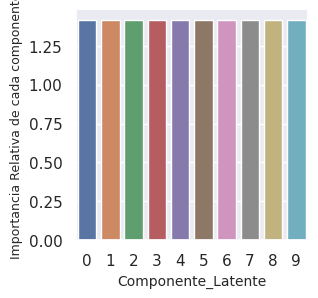

In [55]:
sns.set(rc={'figure.figsize':(3,3)}) 
chart = sns.barplot(x=list(range(len(Sigma))), y = Sigma )
chart.set_xlabel('Componente_Latente', fontdict={'size': 10})
chart.set_ylabel('Importancia Relativa de cada componente', fontdict={'size': 9})
plt.show()

6. Obtener la matriz tokens-temas (term-topic) a partir de la matriz ùëâÙÄØç de la descomposici√≥n SVD. Despliega sus primeros 5 renglones donde se incluya el nombre de las columnas.

In [56]:
lsi_term_topic = V_T 

print(lsi_term_topic.shape)

(44140, 10)


In [57]:
term_names = list(tfidf.get_feature_names_out())

term_topic_matrix = pd.DataFrame(data=lsi_term_topic, 
                                 index = term_names,   
                                 columns = [f'Concepto_Latente_{r}' for r in range(0,V_T.shape[1])]
                                )

print(term_topic_matrix.shape)   #  words X topics

(44140, 10)


In [58]:
term_topic_matrix.head()

Concepto_Latente_0  Concepto_Latente_1  Concepto_Latente_2  \
aaas          1.424755e-12        5.808071e-12       -8.636989e-12   
aac           1.471745e-16        3.484967e-16        1.047897e-16   
aahjko       -8.897317e-14       -1.222633e-13       -3.646194e-14   
aai          -3.962811e-13       -1.649953e-12       -7.359474e-13   
aaim         -4.695466e-12       -2.477449e-12       -9.979799e-13   

        Concepto_Latente_3  Concepto_Latente_4  Concepto_Latente_5  \
aaas         -1.039233e-11       -9.816664e-12       -1.795191e-12   
aac          -1.587946e-16        7.694228e-16        9.944315e-17   
aahjko       -2.238659e-15       -5.602739e-14       -1.402252e-13   
aai           6.168610e-13       -3.883413e-12       -1.627422e-12   
aaim         -4.718187e-13        2.974323e-12        7.985503e-13   

        Concepto_Latente_6  Concepto_Latente_7  Concepto_Latente_8  \
aaas         -3.740662e-12        4.457888e-12       -3.340221e-12   
aac          -1.726789e-16       -4.335490e-16        2.363425e-16   
aahjko        6.755523e-14        1.375580e-12        1.886082e-12   
aai           2.034164e-12       -3.910251e-13        5.295598e-12   
aaim          7.342485e-14       -2.166935e-12        3.373874e-12   

        Concepto_Latente_9  
aaas         -4.352597e-12  
aac           8.342789e-16  
aahjko        1.497398e-12  
aai           8.017196e-12  
aaim          1.505468e-12

7. Con base a la cantidad de conceptos latentes que determinaste en el ejercicio 6 anterior, obtener cada uno de sus gr√°ficos con sus 10 t√©rminos/tokens m√°s importantes. ¬øC√≥mo describir√≠as cada uno de dichos conceptos latentes?

In [ ]:
#NOTA: profesor mand√≥ correo indicando que preguntas 7 y 8 se consideran como una misma pregunta.

8. Para cada uno de los 10 conceptos latentes obtenidos con la descomposici√≥n SVD del ejercicio 5, obtener el gr√°fico de barras que muestre los 10 t√©rminos/tokens m√°s importantes de cada uno de ellos.

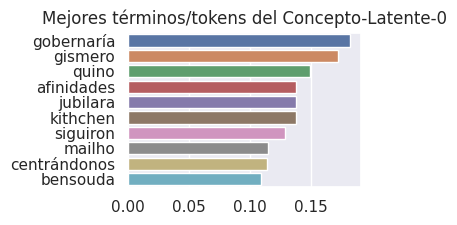

In [59]:
# Seleccionemos por ejemplo una de las columnas/t√≥pico "Concepto_Latente":

data = term_topic_matrix[f'Concepto_Latente_0']

# ordenamos lo valores singulares de la columna/t√≥pico de manera descendente.
data = data.sort_values(ascending=False) # Con la opci√≥n True, visualizar√°s los de menor peso.    

top_w = 10      # Define la cantidad de las mejores "top_w" t√©rminos/words a visualizar.
top_w_matrix = data[:top_w]    # Nos quedamos con los mejores top_w pesos, asociados a 
                               # los top_w terms (words).

sns.set(rc={'figure.figsize':(3,2)}) 
plt.title('Mejores t√©rminos/tokens del Concepto-Latente-0')
fig = sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index)

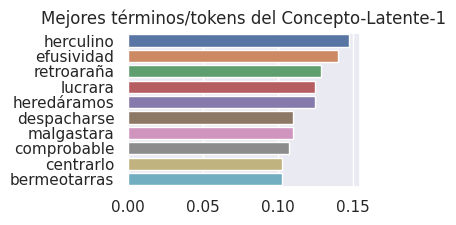

In [60]:
data = term_topic_matrix[f'Concepto_Latente_1']

# ordenamos lo valores singulares de la columna/t√≥pico de manera descendente.
data = data.sort_values(ascending=False) # Con la opci√≥n True, visualizar√°s los de menor peso.    

top_w = 10      # Define la cantidad de las mejores "top_w" t√©rminos/words a visualizar.
top_w_matrix = data[:top_w]    # Nos quedamos con los mejores top_w pesos, asociados a 
                               # los top_w terms (words).

sns.set(rc={'figure.figsize':(3,2)}) 
plt.title('Mejores t√©rminos/tokens del Concepto-Latente-1')
fig = sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index)

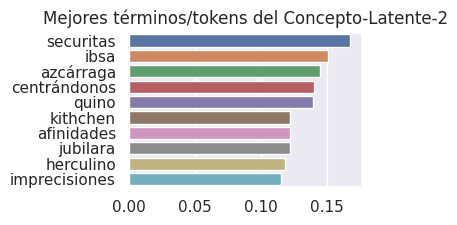

In [61]:
data = term_topic_matrix[f'Concepto_Latente_2']

# ordenamos lo valores singulares de la columna/t√≥pico de manera descendente.
data = data.sort_values(ascending=False) # Con la opci√≥n True, visualizar√°s los de menor peso.    

top_w = 10      # Define la cantidad de las mejores "top_w" t√©rminos/words a visualizar.
top_w_matrix = data[:top_w]    # Nos quedamos con los mejores top_w pesos, asociados a 
                               # los top_w terms (words).

sns.set(rc={'figure.figsize':(3,2)}) 
plt.title('Mejores t√©rminos/tokens del Concepto-Latente-2')
fig = sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index)

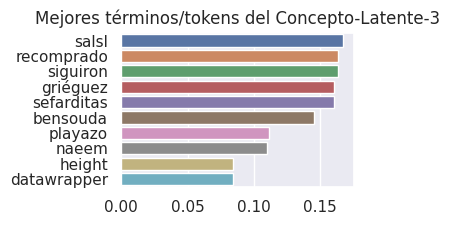

In [62]:
data = term_topic_matrix[f'Concepto_Latente_3']

# ordenamos lo valores singulares de la columna/t√≥pico de manera descendente.
data = data.sort_values(ascending=False) # Con la opci√≥n True, visualizar√°s los de menor peso.    

top_w = 10      # Define la cantidad de las mejores "top_w" t√©rminos/words a visualizar.
top_w_matrix = data[:top_w]    # Nos quedamos con los mejores top_w pesos, asociados a 
                               # los top_w terms (words).

sns.set(rc={'figure.figsize':(3,2)}) 
plt.title('Mejores t√©rminos/tokens del Concepto-Latente-3')
fig = sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index)

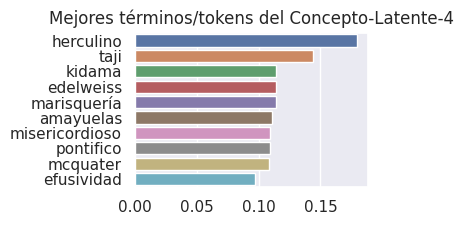

In [63]:
data = term_topic_matrix[f'Concepto_Latente_4']

# ordenamos lo valores singulares de la columna/t√≥pico de manera descendente.
data = data.sort_values(ascending=False) # Con la opci√≥n True, visualizar√°s los de menor peso.    

top_w = 10      # Define la cantidad de las mejores "top_w" t√©rminos/words a visualizar.
top_w_matrix = data[:top_w]    # Nos quedamos con los mejores top_w pesos, asociados a 
                               # los top_w terms (words).

sns.set(rc={'figure.figsize':(3,2)}) 
plt.title('Mejores t√©rminos/tokens del Concepto-Latente-4')
fig = sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index)

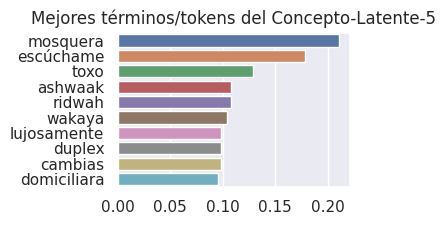

In [64]:
data = term_topic_matrix[f'Concepto_Latente_5']

# ordenamos lo valores singulares de la columna/t√≥pico de manera descendente.
data = data.sort_values(ascending=False) # Con la opci√≥n True, visualizar√°s los de menor peso.    

top_w = 10      # Define la cantidad de las mejores "top_w" t√©rminos/words a visualizar.
top_w_matrix = data[:top_w]    # Nos quedamos con los mejores top_w pesos, asociados a 
                               # los top_w terms (words).

sns.set(rc={'figure.figsize':(3,2)}) 
plt.title('Mejores t√©rminos/tokens del Concepto-Latente-5')
fig = sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index)

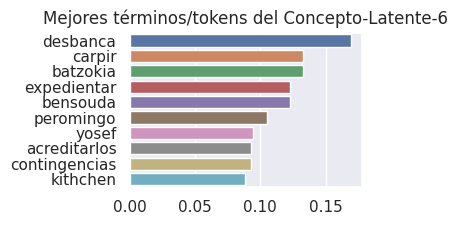

In [65]:
data = term_topic_matrix[f'Concepto_Latente_6']

# ordenamos lo valores singulares de la columna/t√≥pico de manera descendente.
data = data.sort_values(ascending=False) # Con la opci√≥n True, visualizar√°s los de menor peso.    

top_w = 10      # Define la cantidad de las mejores "top_w" t√©rminos/words a visualizar.
top_w_matrix = data[:top_w]    # Nos quedamos con los mejores top_w pesos, asociados a 
                               # los top_w terms (words).

sns.set(rc={'figure.figsize':(3,2)}) 
plt.title('Mejores t√©rminos/tokens del Concepto-Latente-6')
fig = sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index)

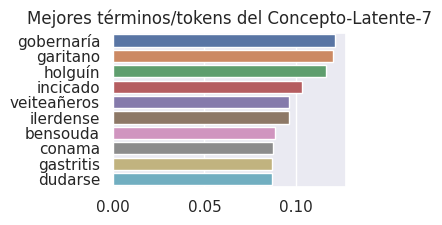

In [66]:
data = term_topic_matrix[f'Concepto_Latente_7']

# ordenamos lo valores singulares de la columna/t√≥pico de manera descendente.
data = data.sort_values(ascending=False) # Con la opci√≥n True, visualizar√°s los de menor peso.    

top_w = 10      # Define la cantidad de las mejores "top_w" t√©rminos/words a visualizar.
top_w_matrix = data[:top_w]    # Nos quedamos con los mejores top_w pesos, asociados a 
                               # los top_w terms (words).

sns.set(rc={'figure.figsize':(3,2)}) 
plt.title('Mejores t√©rminos/tokens del Concepto-Latente-7')
fig = sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index)

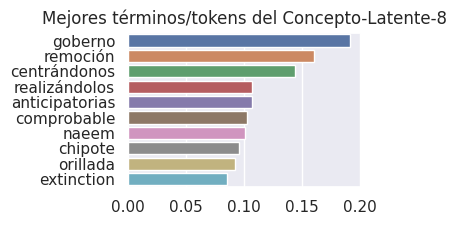

In [67]:
data = term_topic_matrix[f'Concepto_Latente_8']

# ordenamos lo valores singulares de la columna/t√≥pico de manera descendente.
data = data.sort_values(ascending=False) # Con la opci√≥n True, visualizar√°s los de menor peso.    

top_w = 10      # Define la cantidad de las mejores "top_w" t√©rminos/words a visualizar.
top_w_matrix = data[:top_w]    # Nos quedamos con los mejores top_w pesos, asociados a 
                               # los top_w terms (words).

sns.set(rc={'figure.figsize':(3,2)}) 
plt.title('Mejores t√©rminos/tokens del Concepto-Latente-8')
fig = sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index)

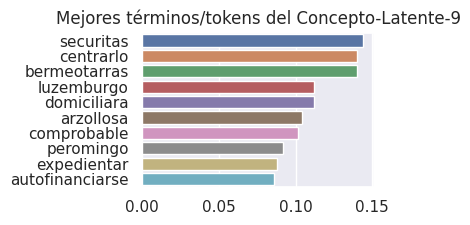

In [68]:
data = term_topic_matrix[f'Concepto_Latente_9']

# ordenamos lo valores singulares de la columna/t√≥pico de manera descendente.
data = data.sort_values(ascending=False) # Con la opci√≥n True, visualizar√°s los de menor peso.    

top_w = 10      # Define la cantidad de las mejores "top_w" t√©rminos/words a visualizar.
top_w_matrix = data[:top_w]    # Nos quedamos con los mejores top_w pesos, asociados a 
                               # los top_w terms (words).

sns.set(rc={'figure.figsize':(3,2)}) 
plt.title('Mejores t√©rminos/tokens del Concepto-Latente-9')
fig = sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index)

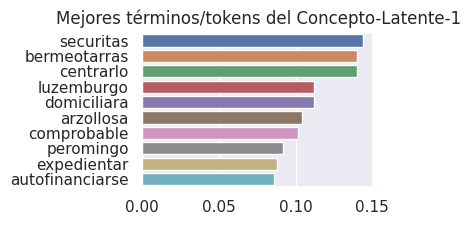

In [69]:
#TEST DESPLEGAR EN SUBPLOTs:
data0 = term_topic_matrix[f'Concepto_Latente_0']
data1 = term_topic_matrix[f'Concepto_Latente_1']
data2 = term_topic_matrix[f'Concepto_Latente_2']
data3 = term_topic_matrix[f'Concepto_Latente_3']
data4 = term_topic_matrix[f'Concepto_Latente_4']
data5 = term_topic_matrix[f'Concepto_Latente_5']
data6 = term_topic_matrix[f'Concepto_Latente_6']
data7 = term_topic_matrix[f'Concepto_Latente_7']
data8 = term_topic_matrix[f'Concepto_Latente_8']
data9 = term_topic_matrix[f'Concepto_Latente_9']

top_w = 10 
dataN = ["data"+str(i) for i in range(0,10)]
Con_Lat = ["Concepto_Latente_"+str(i) for i in range(0,10)]
top_w_matrixN = ["top_w_matrix"+str(i) for i in range(0,10)]
new_top = []
#for i,j,k in dataN, Con_Lat, top_w_matrixN:
#  i = term_topic_matrix[f'{j}']
#  i = i.sort_values(ascending=False)
#  k = i[:top_w] 
#  new_top.append(k)

# ordenamos lo valores singulares de la columna/t√≥pico de manera descendente.
data = data.sort_values(ascending=False) # Con la opci√≥n True, visualizar√°s los de menor peso.    

#top_w = 10      # Define la cantidad de las mejores "top_w" t√©rminos/words a visualizar.
top_w_matrix = data[:top_w]    # Nos quedamos con los mejores top_w pesos, asociados a 
                               # los top_w terms (words).

#dataN = [" "]
titles = ['Mejores t√©rminos/tokens del Concepto-Latente-0', 'Mejores t√©rminos/tokens del Concepto-Latente-1', 'Mejores t√©rminos/tokens del Concepto-Latente-2', 'Mejores t√©rminos/tokens del Concepto-Latente-3', 'Mejores t√©rminos/tokens del Concepto-Latente-4', 'Mejores t√©rminos/tokens del Concepto-Latente-5', 'Mejores t√©rminos/tokens del Concepto-Latente-6', 'Mejores t√©rminos/tokens del Concepto-Latente-7', 'Mejores t√©rminos/tokens del Concepto-Latente-8', 'Mejores t√©rminos/tokens del Concepto-Latente-9']
sns.set(rc={'figure.figsize':(3,2)}) 
plt.title('Mejores t√©rminos/tokens del Concepto-Latente-1')
fig = sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index)

9. Con base a los resultados del ejercicio anterior, ¬øcu√°ntos t√≥picos o conceptos latentes identificas con claridad? ¬øC√≥mo los describir√≠as, es decir, de qu√© tem√°ticas estar√≠an hablando?

10. La librer√≠a de c√≥digo abierto Gensim, incluye la implementaci√≥n de la t√©cnica LSI. Ver
documentaci√≥n: https://radimrehurek.com/gensim/models/lsimodel.html
* Investiga la documentaci√≥n de este modelo LSI en Gensim y aplica dicha t√©cnica a tu conjunto de
datos. En particular, obtener los modelos de 2 a 10 temas/t√≥picos y para cada uno de ellos obtener su valor (score) de coherencia. Con base a dichos valores, ¬øqu√© cantidad de t√≥picos ser√≠a el adecuado? ¬øCoincide con lo que obtuviste previamente, usando la t√©cnica SVD de manera directa?

In [70]:
mi_dicc = corpora.Dictionary(clean1)     # generamos el diccionario

bow = [mi_dicc.doc2bow(doc) for doc in clean1]   # y luego la BOW

In [72]:
for i in range(2,15):
    
    lsi = LsiModel(bow, 
                   num_topics=i, 
                   id2word=mi_dicc,
                   chunksize=6,
                   random_seed=7
                  )     
    
    cm = CoherenceModel(model=lsi, 
                        texts=clean, 
                        dictionary=mi_dicc, 
                        window_size=3,
                        coherence='c_v',
                        topn = 3
                       )
    
    cs = cm.get_coherence()
    
    print('M√©trica de Coherencia con {} clusters: {}'.format(i, cs))

KeyboardInterrupt: ignored

In [ ]:
best_Nclusters = 10

In [ ]:
# Seleccionas el mejor de los anteriores:

lsi = LsiModel(bow, 
               num_topics=5, 
               id2word=mi_dicc,
               chunksize=6,
               random_seed=7
               )

# Veamos la manera en que se distribuyen los t√©rminos en cada t√≥pico generado:
for topic_num, words in lsi.print_topics(num_words=10):
    print('Tokens/Words in Topic {}: {}.'.format(topic_num, words))

##**Parte 2: Asignaci√≥n de Dirichlet Latente (LDA):**

11. Utiliza la librer√≠a Gensim para implementar ahora la t√©cnica de LDA. Revisa la documentaci√≥n correspondiente y aplica de preferencia el modelo paralelizable:
* https://radimrehurek.com/gensim/models/ldamodel.html
* https://radimrehurek.com/gensim/models/ldamulticore.html

In [ ]:
# generamos el diccionario:

id2word = corpora.Dictionary(clean)

for id in range(7):
    print(id2word[id])

In [ ]:
corpus = [id2word.doc2bow(doc) for doc in clean]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                    id2word=id2word,
                    num_topics=3,      # total de t√≥picos que deseas buscar...
                    chunksize=5,    # n√∫mero de documentos a analizar en cada chunk de entrenamiento
                    passes=10,        # n√∫mero de pasadas al corpus durante el entrenamiento.
                    alpha=0.2,        # alfa: similaridad document-topics
                    eta=0.2,         # beta: similaridad topic-words      
                    )

In [ ]:
lda_model.print_topics(num_topics= best_Nclusters, num_words=10)

12. Con base a esta t√©cnica ¬øqu√© cantidad de t√≥picos consideras que es la m√°s adecuada? Compara tus
resultados con el m√©todo LSI. ¬øQu√© encuentras de coincidencias y diferencias? ¬øCu√°l consideras
puede ser el mejor resultado, es decir, cu√°l consideras puede ser la mejor cantidad de t√≥picos a
considerar?

13. La librer√≠a pyLDAvis nos ayuda a visualizar de manera interactiva los temas y tokens de los documentos analizados. Revisa la documentaci√≥n y util√≠zala para visualizar tus mejor resultado.
* https://pypi.org/project/pyLDAvis/

14. Incluye tus conclusiones finales de la actividad.

###**Conclusiones:**

* Se con..

NOTA: Esta actividad est√° distribuida en 2 semanas. Aunque la primera parte de esta actividad se
considera para evaluar la primera semana y la segunda parte para la segunda semana, la entrega de toda la
actividad ser√° hasta el final de la segunda semana en un solo documento. Al hacer la evaluaci√≥n de la
actividad se distribuir√°n las calificaciones en cada semana.

In [ ]:
#c√≥digo de: https://keepcoding.io/blog/que-es-la-lematizacion-en-python/  & https://github.com/michmech/lemmatization-lists/blob/master/lemmatization-es.txt
import os

#Lematizaci√≥n en Python
data_path = ' ./data'
lemmas_dict_file = 'lemmatization-es.txt'
path = '/content/lemmatization-es.txt'

#Lematizaci√≥n en Python
def get_lemmas_dict ():
       lemmas_dict = {}
       with open (path, 'r') as f: #/content/lemmatization-es.txt
               for line in f:
                     (key, val) = line.split ()
                     lemmas_dict [str (val)] = key
       return lemmas_dict

#Lematizaci√≥n en Python
lemmas_dict = get_lemmas_dict ()

#for f in range(5):
#  print(lemmas_dict.items(f))


#Bibliograf√≠a:
#https://snyk.io/advisor/python/spacy-spanish-lemmatizer